# **Weather Data Analysis for Outdoor Activity Planning**

**Project Overivew**
The Weather Data Analysis and Forecasting Tool is a Python-based project designed to analyze real-time weather forecast data for informed decision-making regarding outdoor activities. The project leverages Python data science tools to fetch, clean, analyze, and visualize weather data. Key functionalities include data cleaning to normalize and handle anomalies, enhanced visualization to incorporate humidity data, forecast comparison between cities, aggregate data analysis to determine optimal outdoor activity times, and computation of weather metrics such as average temperature and humidity. The tool aims to provide users with comprehensive insights into weather conditions to facilitate effective planning and decision-making for outdoor activities.

In [ ]:
# Imports libraries for HTTP requests, data manipulation, visualization, date/time handling, and execution time measurement.

import requests # Imports the library that creates requests
import pandas as pd # Imports the library for data analysis
import numpy as np  # Imports the numpy library for addtional data analysis
import matplotlib.pyplot as plt # Imports the library that is used for data analysis
from datetime import datetime ,timedelta # Used for handling dates and times
import timeit # Used for the time codes
import json # Imports the json module that allows us to work with json data

In [ ]:
# Fetches requested weather information from meto API and handles any errors that might occur


def fetch_weather_forecast(latitude, longitude):
  """Fetch weather forecast data using Open-Meteo API."""
  base_url = "https://api.open-meteo.com/v1/forecast"
  parameters ={
      "latitude": latitude,
      "longitude": longitude,
      "hourly": "temperature",
  }


  try:
    response = requests.get(base_url,params = parameters) # Makes an requests to the API that is within the defined parameters
    response.raise_for_status() # Lets the users know the status of of an error
    return response.json() # Parase the JSON response and returns it

  except requests.exceptions.HTTPError as http_err: # Handles HTTP errors
        print(f"HTTP Error Occured:{http_err}")

  except requests.exceptions.ConnectionError as conn_err: # Handles connection errors
        print(f"Connection Error occured:{conn_err}")

  except requests.exceptions.Timeout as timeout_err:
        print(f"Timeout error occured:{timeout_err}") # Handles timeoit errors

  except Exception as err: # Handles any other types of errors that may occur
        print(f"An error ocuured:{err}")

  else:
    return None # Retuns none if there are no errors


In [ ]:
# Gets the weather forecast using the fetch weather function
NY_forecast = fetch_weather_forecast(40.7128,-74.0060)
LA_forecast = fetch_weather_forecast( 34.0522,-118.2437)

print('Here is the NY weather forecast')
print()
print(NY_forecast)

print()
print('Here is the LA weather forecast')
print()
print(LA_forecast)


Here is the NY weather forecast

{'latitude': 40.710335, 'longitude': -73.99307, 'generationtime_ms': 0.03790855407714844, 'utc_offset_seconds': 0, 'timezone': 'GMT', 'timezone_abbreviation': 'GMT', 'elevation': 32.0, 'hourly_units': {'time': 'iso8601', 'temperature': '°C'}, 'hourly': {'time': ['2024-04-15T00:00', '2024-04-15T01:00', '2024-04-15T02:00', '2024-04-15T03:00', '2024-04-15T04:00', '2024-04-15T05:00', '2024-04-15T06:00', '2024-04-15T07:00', '2024-04-15T08:00', '2024-04-15T09:00', '2024-04-15T10:00', '2024-04-15T11:00', '2024-04-15T12:00', '2024-04-15T13:00', '2024-04-15T14:00', '2024-04-15T15:00', '2024-04-15T16:00', '2024-04-15T17:00', '2024-04-15T18:00', '2024-04-15T19:00', '2024-04-15T20:00', '2024-04-15T21:00', '2024-04-15T22:00', '2024-04-15T23:00', '2024-04-16T00:00', '2024-04-16T01:00', '2024-04-16T02:00', '2024-04-16T03:00', '2024-04-16T04:00', '2024-04-16T05:00', '2024-04-16T06:00', '2024-04-16T07:00', '2024-04-16T08:00', '2024-04-16T09:00', '2024-04-16T10:00', '202

In [ ]:
# Updates the analyze and visualoize function to a new city name


def analyze_and_visualize_forecast(data, city_name):

  if data:
    forecast_dates = data['hourly']['time']
    temperatures = data['hourly']['temperature']

    dates = [datetime.fromisoformat(date) for date in forecast_dates]

    plt.figure(figsize=(10, 5))
    plt.plot(dates[:24], temperatures[:24], marker='o', linestyle='-', label={city_name})
    plt.title(f'24-hour Temprature Forecast for {city_name}')
    plt.xlabel('Time')
    plt.ylabel('Temprature (°C)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()
  else:
    print(f"No data to analyze and visualize for {city_name}")


In [ ]:
#Converst the JSON data form the API to a pandas DataFrame


def convert_to_dataframe(forecast_data):
    """
    Converts JSON data from the weather API into a pandas DataFrame.

    :param forecast_data: JSON object containing the weather forecast data.
    :return: DataFrame containing the weather forecast.
    """
    try:
        # If the JSON data is nested, you may need to access the specific key where the data list is located
        if 'hourly' in forecast_data:
            # Convert the nested 'hourly' data to a DataFrame
            df = pd.json_normalize(forecast_data['hourly'])
        else:
            # If the JSON data is already in the form of a dictionary at the top level
            df = pd.DataFrame(forecast_data)
        display(df.head())
        print(forecast_data)
        return df

    except Exception as e:
        print(f"An error occurred while converting to DataFrame: {e}")




In [ ]:
# Creates the weather forecast df using the convert to dataframe functiom

NY_weather_df = convert_to_dataframe(NY_forecast)
LA_weather_df = convert_to_dataframe(LA_forecast)

print('Here is the NY weather forecast dataframe')
print()
print(NY_weather_df)

print()
print('Here is the LA weather forecast dataframe')
print()
print(LA_weather_df)

,time,temperature
0,"[2024-04-15T00:00, 2024-04-15T01:00, 2024-04-1...","[18.5, 17.2, 14.9, 15.1, 15.8, 15.0, 14.9, 14...."


{'latitude': 40.710335, 'longitude': -73.99307, 'generationtime_ms': 0.03790855407714844, 'utc_offset_seconds': 0, 'timezone': 'GMT', 'timezone_abbreviation': 'GMT', 'elevation': 32.0, 'hourly_units': {'time': 'iso8601', 'temperature': '°C'}, 'hourly': {'time': ['2024-04-15T00:00', '2024-04-15T01:00', '2024-04-15T02:00', '2024-04-15T03:00', '2024-04-15T04:00', '2024-04-15T05:00', '2024-04-15T06:00', '2024-04-15T07:00', '2024-04-15T08:00', '2024-04-15T09:00', '2024-04-15T10:00', '2024-04-15T11:00', '2024-04-15T12:00', '2024-04-15T13:00', '2024-04-15T14:00', '2024-04-15T15:00', '2024-04-15T16:00', '2024-04-15T17:00', '2024-04-15T18:00', '2024-04-15T19:00', '2024-04-15T20:00', '2024-04-15T21:00', '2024-04-15T22:00', '2024-04-15T23:00', '2024-04-16T00:00', '2024-04-16T01:00', '2024-04-16T02:00', '2024-04-16T03:00', '2024-04-16T04:00', '2024-04-16T05:00', '2024-04-16T06:00', '2024-04-16T07:00', '2024-04-16T08:00', '2024-04-16T09:00', '2024-04-16T10:00', '2024-04-16T11:00', '2024-04-16T12:00

,time,temperature
0,"[2024-04-15T00:00, 2024-04-15T01:00, 2024-04-1...","[12.8, 13.3, 12.6, 11.4, 10.7, 10.1, 9.8, 9.3,..."


{'latitude': 34.060257, 'longitude': -118.234344, 'generationtime_ms': 0.047087669372558594, 'utc_offset_seconds': 0, 'timezone': 'GMT', 'timezone_abbreviation': 'GMT', 'elevation': 91.0, 'hourly_units': {'time': 'iso8601', 'temperature': '°C'}, 'hourly': {'time': ['2024-04-15T00:00', '2024-04-15T01:00', '2024-04-15T02:00', '2024-04-15T03:00', '2024-04-15T04:00', '2024-04-15T05:00', '2024-04-15T06:00', '2024-04-15T07:00', '2024-04-15T08:00', '2024-04-15T09:00', '2024-04-15T10:00', '2024-04-15T11:00', '2024-04-15T12:00', '2024-04-15T13:00', '2024-04-15T14:00', '2024-04-15T15:00', '2024-04-15T16:00', '2024-04-15T17:00', '2024-04-15T18:00', '2024-04-15T19:00', '2024-04-15T20:00', '2024-04-15T21:00', '2024-04-15T22:00', '2024-04-15T23:00', '2024-04-16T00:00', '2024-04-16T01:00', '2024-04-16T02:00', '2024-04-16T03:00', '2024-04-16T04:00', '2024-04-16T05:00', '2024-04-16T06:00', '2024-04-16T07:00', '2024-04-16T08:00', '2024-04-16T09:00', '2024-04-16T10:00', '2024-04-16T11:00', '2024-04-16T12

In [ ]:
# Uses the pandas function.explode to put the df into a more readable format

forecast_data_NY = NY_weather_df.explode('temperature')
forecast_data_LA = LA_weather_df.explode('temperature')

print('Here is the NY df in a table format')
print(forecast_data_NY)
print()
print('Here is the LA df in a table format')
print(forecast_data_LA)

Here is the NY df in a table format
                                                 time temperature
0   [2024-04-15T00:00, 2024-04-15T01:00, 2024-04-1...        18.5
0   [2024-04-15T00:00, 2024-04-15T01:00, 2024-04-1...        17.2
0   [2024-04-15T00:00, 2024-04-15T01:00, 2024-04-1...        14.9
0   [2024-04-15T00:00, 2024-04-15T01:00, 2024-04-1...        15.1
0   [2024-04-15T00:00, 2024-04-15T01:00, 2024-04-1...        15.8
..                                                ...         ...
0   [2024-04-15T00:00, 2024-04-15T01:00, 2024-04-1...        14.8
0   [2024-04-15T00:00, 2024-04-15T01:00, 2024-04-1...        15.1
0   [2024-04-15T00:00, 2024-04-15T01:00, 2024-04-1...        15.0
0   [2024-04-15T00:00, 2024-04-15T01:00, 2024-04-1...        14.4
0   [2024-04-15T00:00, 2024-04-15T01:00, 2024-04-1...        13.5

[168 rows x 2 columns]

Here is the LA df in a table format
                                                 time temperature
0   [2024-04-15T00:00, 2024-04-15T01:00, 2024

In [ ]:
#This function cleans and normalizes the temperature data obtained from the API.It replaces unusally high or low temps with NaN and fills missing data with the mean temp
#Dajia

def clean_temperature_data_NaN(data):
    """
    Normalize and clean temperature data.
    - Replace any temperature anomalies (e.g., unusually high or low values) with NaN
    - Fill missing values with the mean temperature of the dataset
    """


    min_temp = 8 # Sets the minimum temp
    max_temp = 17 # Sets the max temp

    # Replace any temperature anomalies with NaN
    data.loc[data['temperature'] < min_temp, 'temperature'] = np.nan
    data.loc[data['temperature'] > max_temp, 'temperature'] = np.nan


    mean_temp = data['temperature'].mean() # Calculate the mean temperature


    data['temperature'].fillna(mean_temp, inplace=True)  # Fill missing values (NaNs) with the mean temperature

    return data



In [ ]:
# Using the clean temperature function

cleaned_NY_data = clean_temperature_data_NaN(forecast_data_NY)
cleaned_LA_data = clean_temperature_data_NaN(forecast_data_LA)

print('Here is the cleaned NYC dataframe')
print()
print(cleaned_NY_data)
print('Here is the cleaned LA dataframe')
print()
print(cleaned_LA_data)

Here is the cleaned NYC dataframe

                                                 time  temperature
0   [2024-04-15T00:00, 2024-04-15T01:00, 2024-04-1...     11.80229
0   [2024-04-15T00:00, 2024-04-15T01:00, 2024-04-1...     11.80229
0   [2024-04-15T00:00, 2024-04-15T01:00, 2024-04-1...     14.90000
0   [2024-04-15T00:00, 2024-04-15T01:00, 2024-04-1...     15.10000
0   [2024-04-15T00:00, 2024-04-15T01:00, 2024-04-1...     15.80000
..                                                ...          ...
0   [2024-04-15T00:00, 2024-04-15T01:00, 2024-04-1...     14.80000
0   [2024-04-15T00:00, 2024-04-15T01:00, 2024-04-1...     15.10000
0   [2024-04-15T00:00, 2024-04-15T01:00, 2024-04-1...     15.00000
0   [2024-04-15T00:00, 2024-04-15T01:00, 2024-04-1...     14.40000
0   [2024-04-15T00:00, 2024-04-15T01:00, 2024-04-1...     13.50000

[168 rows x 2 columns]
Here is the cleaned LA dataframe

                                                 time  temperature
0   [2024-04-15T00:00, 2024-04-15T01

In [ ]:
def create_weather_data(start_date, end_date, size):
    # Setting a seed for reproducibility
    np.random.seed(0)

    # Generate a date range
    dates = pd.date_range(start_date, periods=size, freq='H')

    # Create realistic temperature data
    temperatures = np.random.normal(loc=20, scale=5, size=size)

    # Introduce some errors: Set a few temperatures abnormally high or low
    error_indices = np.random.choice(range(size), size=int(0.1 * size), replace=False)
    temperatures[error_indices] = np.random.choice([np.nan, -10, 50], size=len(error_indices))

    # Create realistic humidity data
    humidity = np.random.uniform(low=30, high=90, size=size)

    # Introduce missing values
    humidity[np.random.choice(range(size), size=int(0.05 * size), replace=False)] = np.nan

    # Create a DataFrame
    weather_data = pd.DataFrame({'date': dates,
                                 'temperature': temperatures,
                                 'humidity': humidity})

    # Verify all arrays are of the same length
    assert len(dates) == len(temperatures) == len(humidity), "All arrays must be of the same length"

    return weather_data

# Creates the data for city 1

start_date_city1 = datetime.now()
end_date_city1 = start_date_city1 + timedelta(days=10)
size_city1 = (end_date_city1 - start_date_city1).days * 24  # Assuming hourly data
weather_data_city1 = create_weather_data(start_date_city1, end_date_city1, size_city1)

#Creates the data for city 2
start_date_city2 = datetime.now()
end_date_city2 = start_date_city2 + timedelta(days=10)
size_city2 = (end_date_city2 - start_date_city2).days * 24  # Assuming hourly data
weather_data_city2 = create_weather_data(start_date_city2, end_date_city2, size_city2)

#Changes the temperature and humidity values for city 2

weather_data_city2['temperature'] = np.random.normal(loc = 40, scale= 10 , size = size_city2)
weather_data_city2['humidity'] = np.random.uniform(low = 20, high=100 , size = size_city2)


In [ ]:
print(weather_data_city1)

                          date  temperature   humidity
0   2024-04-15 01:46:16.698746    28.820262  81.739113
1   2024-04-15 02:46:16.698746    22.000786  32.921418
2   2024-04-15 03:46:16.698746          NaN  45.218551
3   2024-04-15 04:46:16.698746    31.204466  56.768131
4   2024-04-15 05:46:16.698746    29.337790  36.277673
..                         ...          ...        ...
235 2024-04-24 20:46:16.698746    23.905991  88.243887
236 2024-04-24 21:46:16.698746    27.472423  30.231621
237 2024-04-24 22:46:16.698746     9.650075  40.714798
238 2024-04-24 23:46:16.698746    22.131294  66.772005
239 2024-04-25 00:46:16.698746    23.384540  34.882176

[240 rows x 3 columns]


In [ ]:
print(weather_data_city2)

                          date  temperature   humidity
0   2024-04-15 01:46:16.708303    46.216709  74.783932
1   2024-04-15 02:46:16.708303    32.137385  81.892723
2   2024-04-15 03:46:16.708303    41.843790  71.777438
3   2024-04-15 04:46:16.708303    45.058166  50.859125
4   2024-04-15 05:46:16.708303    32.328913  22.525968
..                         ...          ...        ...
235 2024-04-24 20:46:16.708303    52.172569  81.730570
236 2024-04-24 21:46:16.708303    56.252574  47.187443
237 2024-04-24 22:46:16.708303    53.877040  37.450241
238 2024-04-24 23:46:16.708303    36.402894  44.705529
239 2024-04-25 00:46:16.708303    21.468488  60.557258

[240 rows x 3 columns]


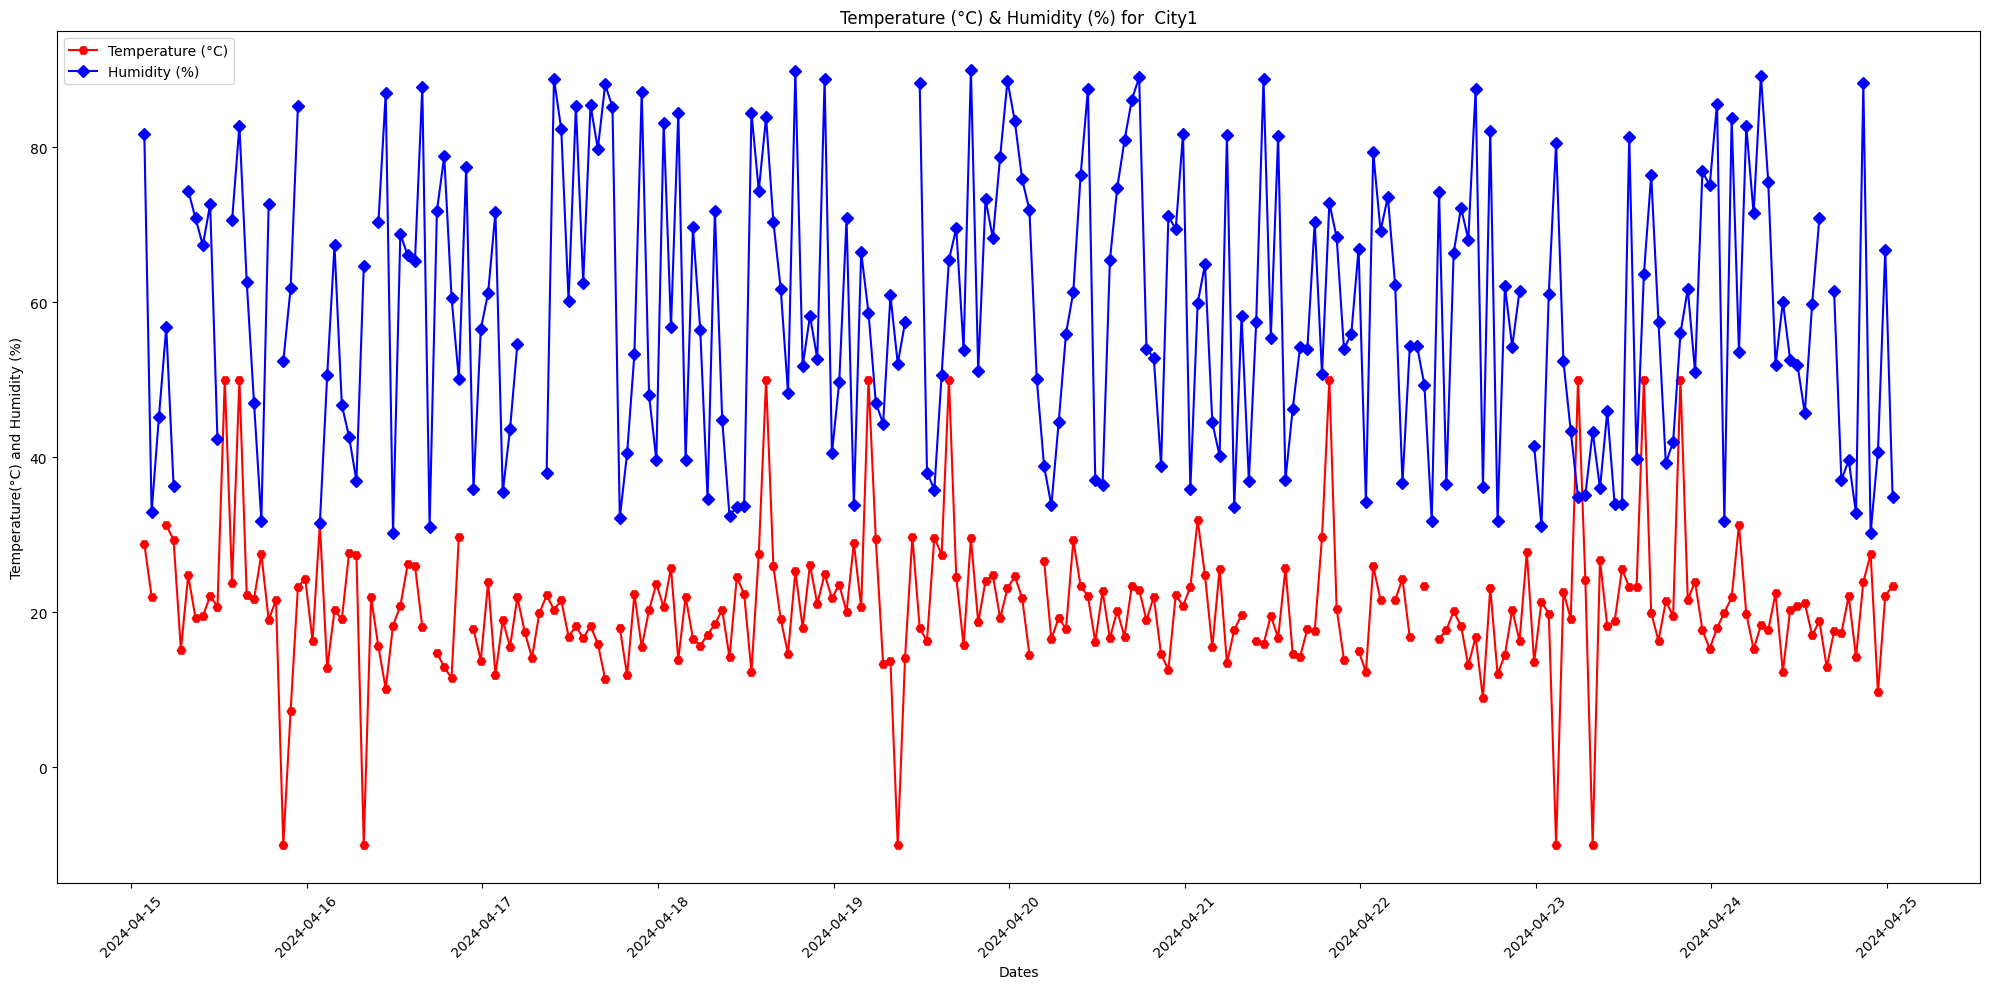

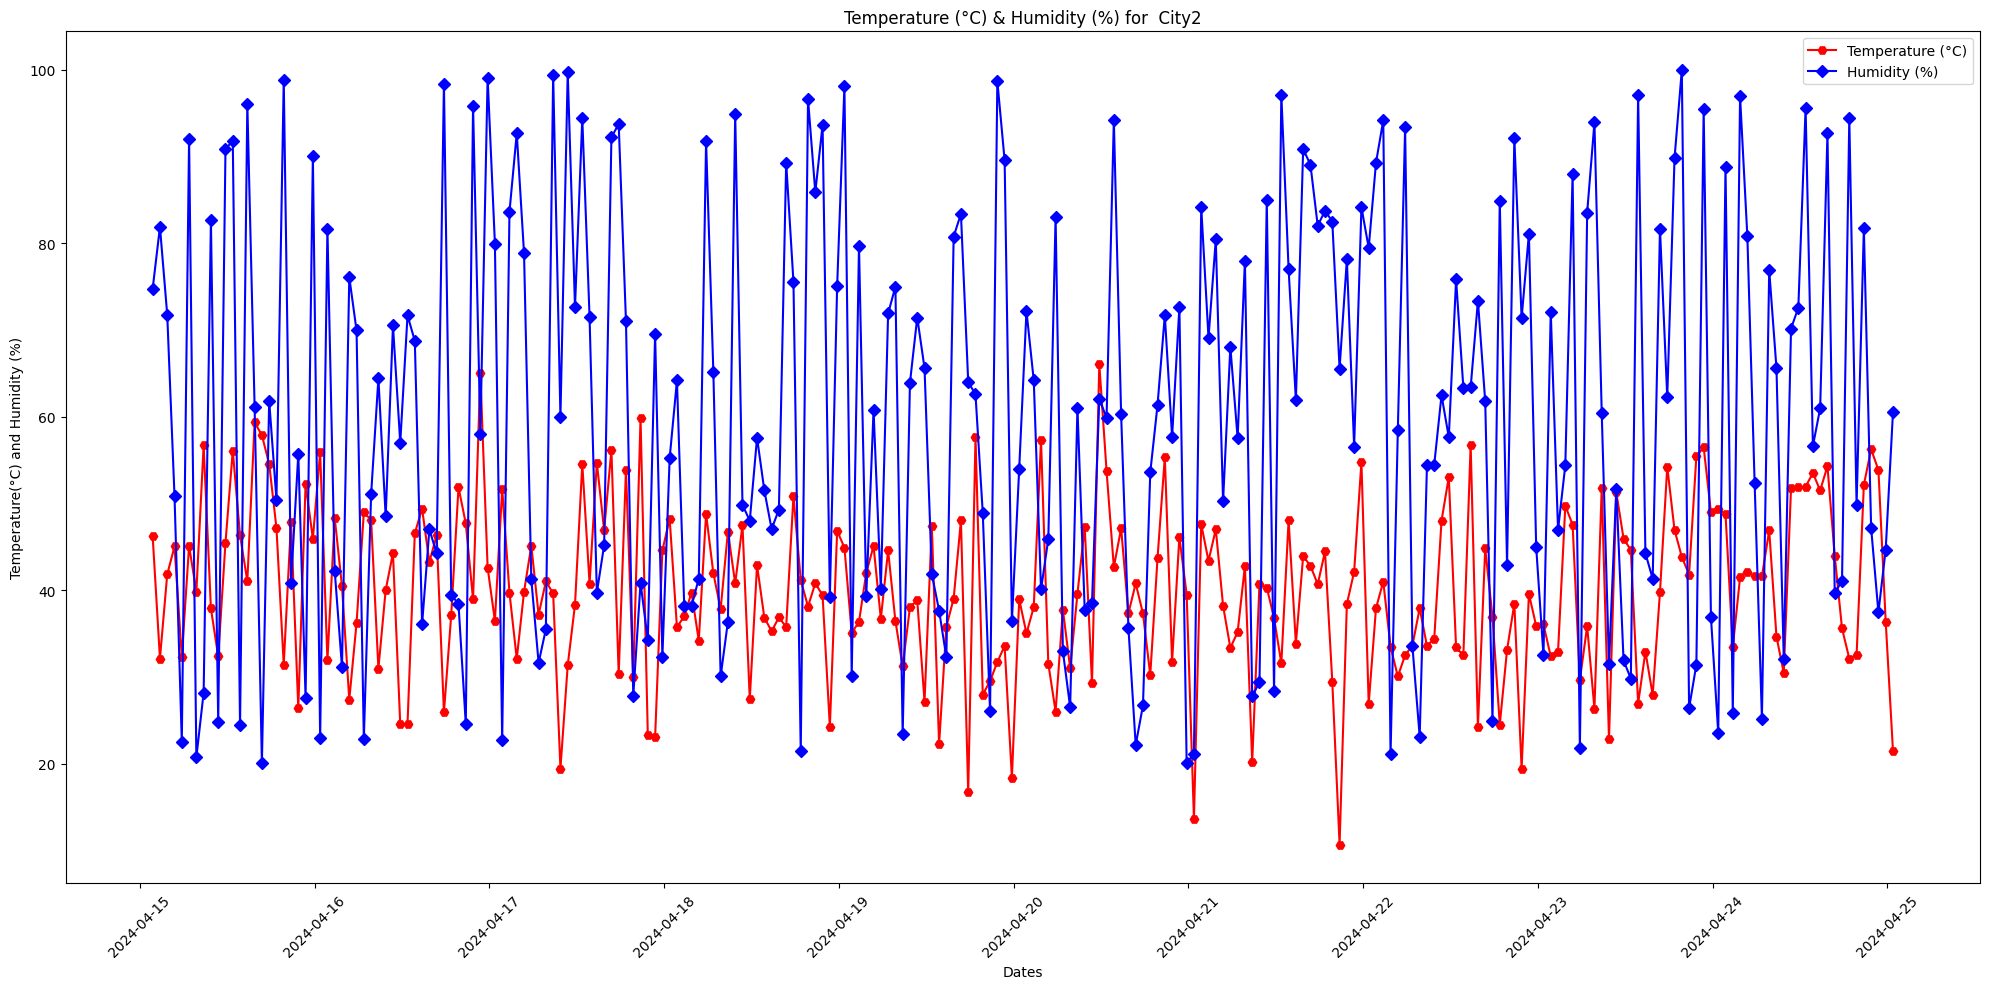

In [ ]:
#This function enhances the visualization so that it includes humidity data; both temperature and humidity are plotted on the same graph


def analyze_and_visualize_forecast_enhanced(data, city_name):
    """
    Enhance the existing visualization to include humidity data.
    - Plot both temperature and humidity on the same graph.
    - Use different colors and markers for each metric.
    """
    # Plots the temperature and Humidity
    Date = data['date']
    Temperature = data['temperature']
    Humidity = data['humidity']

    plt.figure(figsize=(20, 10))  # determines the size of the graph
    plt.plot(Date, Temperature, color='red', marker='H', label='Temperature (°C)')
    plt.plot(Date, Humidity, color='blue', marker='D', label='Humidity (%)')
    plt.title(f'Temperature (°C) & Humidity (%) for {city_name}')  # Adds the title to the graph
    plt.xlabel('Dates')  # Labels the x-axis
    plt.ylabel('Temperature(°C) and Humidity (%)')  # Labels the y-axis
    plt.legend()  # Adds a legend to the plot
    plt.xticks(rotation=45)  # Rotates the x-axis so we can see the information more clearly
    plt.tight_layout()  # Adjusts the layout to prevent overlapping of any labels
    plt.show()  # Displays the plot

# Call the function for each city
analyze_and_visualize_forecast_enhanced(weather_data_city1, " City1")
print()
analyze_and_visualize_forecast_enhanced(weather_data_city2, " City2")

In [ ]:
print(weather_data_city1) # prints the date, temperature and humdity for city 1

                          date  temperature   humidity
0   2024-04-15 01:46:16.698746    28.820262  81.739113
1   2024-04-15 02:46:16.698746    22.000786  32.921418
2   2024-04-15 03:46:16.698746          NaN  45.218551
3   2024-04-15 04:46:16.698746    31.204466  56.768131
4   2024-04-15 05:46:16.698746    29.337790  36.277673
..                         ...          ...        ...
235 2024-04-24 20:46:16.698746    23.905991  88.243887
236 2024-04-24 21:46:16.698746    27.472423  30.231621
237 2024-04-24 22:46:16.698746     9.650075  40.714798
238 2024-04-24 23:46:16.698746    22.131294  66.772005
239 2024-04-25 00:46:16.698746    23.384540  34.882176

[240 rows x 3 columns]


In [ ]:
print(weather_data_city2)# prints the date, temperature and humdity for city 2

                          date  temperature   humidity
0   2024-04-15 01:46:16.708303    46.216709  74.783932
1   2024-04-15 02:46:16.708303    32.137385  81.892723
2   2024-04-15 03:46:16.708303    41.843790  71.777438
3   2024-04-15 04:46:16.708303    45.058166  50.859125
4   2024-04-15 05:46:16.708303    32.328913  22.525968
..                         ...          ...        ...
235 2024-04-24 20:46:16.708303    52.172569  81.730570
236 2024-04-24 21:46:16.708303    56.252574  47.187443
237 2024-04-24 22:46:16.708303    53.877040  37.450241
238 2024-04-24 23:46:16.708303    36.402894  44.705529
239 2024-04-25 00:46:16.708303    21.468488  60.557258

[240 rows x 3 columns]


In [ ]:
city1_24h = weather_data_city1.head(24) # isolates the data for the first 24 hours of city 1
print(city1_24h)

                         date  temperature   humidity
0  2024-04-15 01:46:16.698746    28.820262  81.739113
1  2024-04-15 02:46:16.698746    22.000786  32.921418
2  2024-04-15 03:46:16.698746          NaN  45.218551
3  2024-04-15 04:46:16.698746    31.204466  56.768131
4  2024-04-15 05:46:16.698746    29.337790  36.277673
5  2024-04-15 06:46:16.698746    15.113611        NaN
6  2024-04-15 07:46:16.698746    24.750442  74.405852
7  2024-04-15 08:46:16.698746    19.243214  70.830869
8  2024-04-15 09:46:16.698746    19.483906  67.343066
9  2024-04-15 10:46:16.698746    22.052993  72.631704
10 2024-04-15 11:46:16.698746    20.720218  42.295421
11 2024-04-15 12:46:16.698746    50.000000        NaN
12 2024-04-15 13:46:16.698746    23.805189  70.574549
13 2024-04-15 14:46:16.698746    50.000000  82.754086
14 2024-04-15 15:46:16.698746    22.219316  62.620683
15 2024-04-15 16:46:16.698746    21.668372  46.961979
16 2024-04-15 17:46:16.698746    27.470395  31.814115
17 2024-04-15 18:46:16.69874

In [ ]:
city2_24h = weather_data_city2.head(24) # # isolates the data for the first 24 hours of city 2
print(city2_24h)

                         date  temperature   humidity
0  2024-04-15 01:46:16.708303    46.216709  74.783932
1  2024-04-15 02:46:16.708303    32.137385  81.892723
2  2024-04-15 03:46:16.708303    41.843790  71.777438
3  2024-04-15 04:46:16.708303    45.058166  50.859125
4  2024-04-15 05:46:16.708303    32.328913  22.525968
5  2024-04-15 06:46:16.708303    45.144232  92.080633
6  2024-04-15 07:46:16.708303    39.821802  20.750014
7  2024-04-15 08:46:16.708303    56.734881  28.191196
8  2024-04-15 09:46:16.708303    37.906798  82.661935
9  2024-04-15 10:46:16.708303    32.393910  24.871378
10 2024-04-15 11:46:16.708303    45.490374  90.863707
11 2024-04-15 12:46:16.708303    56.107281  91.848878
12 2024-04-15 13:46:16.708303    46.331512  24.478515
13 2024-04-15 14:46:16.708303    41.053454  96.076469
14 2024-04-15 15:46:16.708303    59.354141  61.156997
15 2024-04-15 16:46:16.708303    57.889916  20.055324
16 2024-04-15 17:46:16.708303    54.570015  61.869174
17 2024-04-15 18:46:16.70830

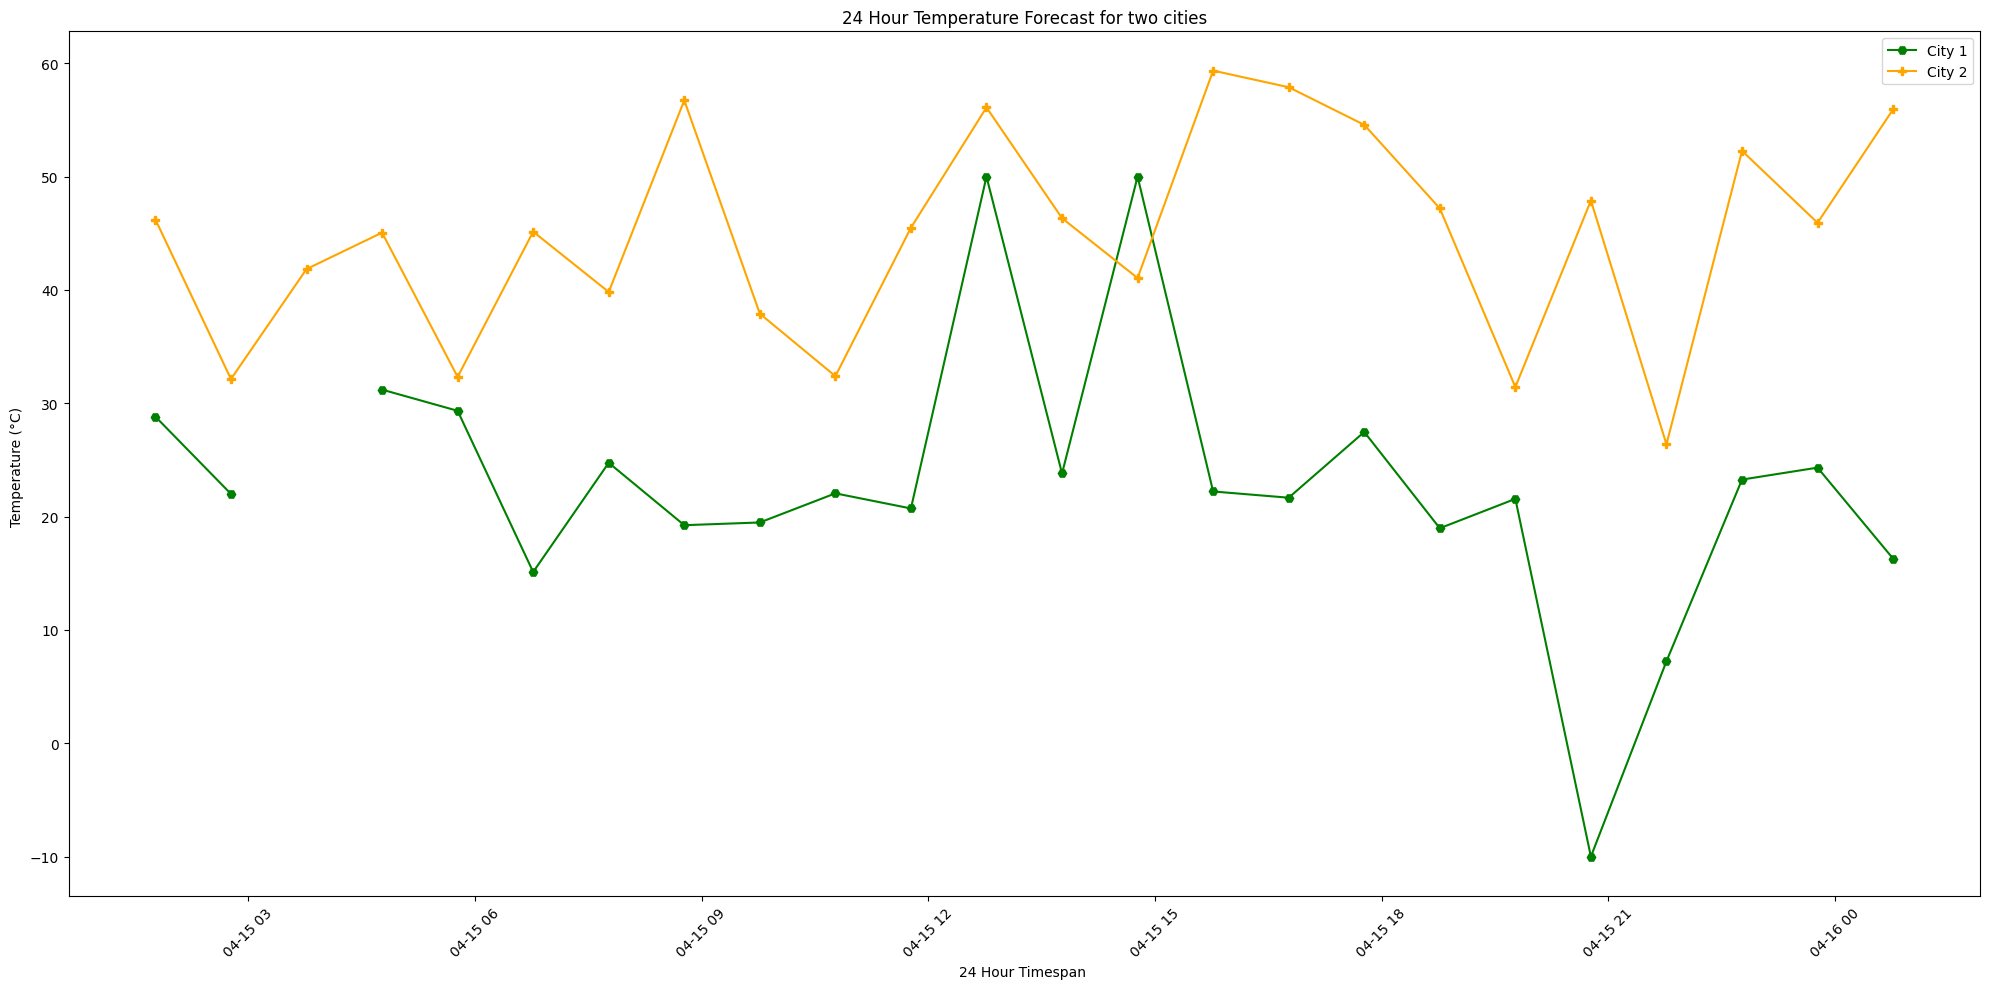

In [ ]:
#This function compares the 24 hour temperature forecast between two cities and plots the data on the same graph


def compare_forecasts(data_city1, data_city2, city_name1, city_name2):
    """
    Compare the 24-hour temperature forecast between two cities.
    - Plot the temperature forecasts of both cities on the same graph.
    - Include a legend to differentiate between cities.
    """
    # Gets the time and temperature for both cities
    city1_time_24h = city1_24h['date']
    city1_temp_24h  = city1_24h['temperature']

    city2_time_24h = city2_24h['date']
    city2_temp_24h = city2_24h['temperature']

    # Plots the time and temperature for both cities on the same graph
    plt.figure(figsize=(20, 10))  # Determines the size of the graph
    plt.plot(city1_time_24h,city1_temp_24h, color='green', marker='H', label=city_name1)
    plt.plot(city2_time_24h,city2_temp_24h, color='orange', marker='P', label=city_name2)
    plt.title('24 Hour Temperature Forecast for two cities')  # Adds the title to the graph
    plt.xlabel('24 Hour Timespan ')  # Labels the x-axis
    plt.ylabel('Temperature (°C) ')  # Labels the y-axis
    plt.legend()  # Adds a legend to the plot
    plt.xticks(rotation=45)  # Rotates the x-axis so we can see the information more clearly
    plt.tight_layout()  # Adjusts the layout to prevent overlapping of any labels
    plt.show()  # Displays the plot

compare_forecasts(weather_data_city1, weather_data_city2, "City 1", "City 2")


In [ ]:
# Analyzes temperature and humidity data to determine the best time for outdoor activities

def find_best_outdoor_activity_time(data):
    """
    Analyze temperature and humidity data to determine the best time of day for outdoor activities.
    - Consider a comfortable temperature range and lower humidity as ideal conditions.
    - Return the time period(s) that best match these conditions.
    """
    # Define comfortable temperature and humidity ranges
    # This step sets the desired temperature range (20°C to 30°C) and humidity range (30% to 60%)
    comfortable_temp_range = (20, 30)
    low_humidity_range = (30, 60)

    # Filter data to include only comfortable temperature and low humidity
    comfortable_data = data[(data['temperature'] >= comfortable_temp_range[0]) & (data['temperature'] <= comfortable_temp_range[1])]
    # It further filters 'comfortable_data' to include only rows where humidity is between 30% and 60% (inclusive)
    comfortable_data = comfortable_data[(comfortable_data['humidity'] >= low_humidity_range[0]) & (comfortable_data['humidity'] <= low_humidity_range[1])]

    # Find the time period(s) that best match these conditions
    # This step initializes an empty list 'best_times' to store the best time periods
    best_times = []
    # It iterates over each row in the 'comfortable_data' DataFrame
    for i in range(len(comfortable_data)):
        # For each row, it extracts the 'date' value as the start time of the time period
        start_time = comfortable_data.iloc[i]['date']
        # It calculates the end time by adding one hour to the start time using timedelta
        end_time = start_time + pd.Timedelta(hours=1)
        # It appends the start time and end time as a tuple to the 'best_times' list
        best_times.append((start_time, end_time))

    # Return the list of best time periods for outdoor activities
    return best_times

# Call the find_best_outdoor_activity_time function with weather_data_city1 DataFrame
find_best_outdoor_activity_time(weather_data_city1)

# Call the find_best_outdoor_activity_time function with weather_data_city2 DataFrame
find_best_outdoor_activity_time(weather_data_city2)

[(Timestamp('2024-04-15 21:46:16.708303'),
  Timestamp('2024-04-15 22:46:16.708303')),
 (Timestamp('2024-04-16 11:46:16.708303'),
  Timestamp('2024-04-16 12:46:16.708303')),
 (Timestamp('2024-04-17 21:46:16.708303'),
  Timestamp('2024-04-17 22:46:16.708303')),
 (Timestamp('2024-04-18 11:46:16.708303'),
  Timestamp('2024-04-18 12:46:16.708303')),
 (Timestamp('2024-04-18 22:46:16.708303'),
  Timestamp('2024-04-18 23:46:16.708303')),
 (Timestamp('2024-04-19 13:46:16.708303'),
  Timestamp('2024-04-19 14:46:16.708303')),
 (Timestamp('2024-04-19 19:46:16.708303'),
  Timestamp('2024-04-19 20:46:16.708303')),
 (Timestamp('2024-04-20 10:46:16.708303'),
  Timestamp('2024-04-20 11:46:16.708303')),
 (Timestamp('2024-04-23 09:46:16.708303'),
  Timestamp('2024-04-23 10:46:16.708303')),
 (Timestamp('2024-04-23 15:46:16.708303'),
  Timestamp('2024-04-23 16:46:16.708303'))]

In [ ]:
#calculates the average temperature and humidity from a weather DataFrame

def compute_average_weather_metrics(df_weather):
    """
    Compute the average temperature and humidity from a weather DataFrame.

    Parameters:
    - df_weather: DataFrame containing weather data with 'temperature' and 'humidity' columns.

    Returns:
    - A tuple containing the average temperature and average humidity.
    """
    # Compute the average temperature from the 'temperature' column of the DataFrame
    average_temperature = df_weather['temperature'].mean()

    # Compute the average humidity from the 'humidity' column of the DataFrame
    average_humidity = df_weather['humidity'].mean()

    # Print the average temperature with the appropriate unit (°C)
    print(f"Average Temperature = {average_temperature}°C")

    # Print the average humidity with the appropriate unit (%)
    print(f"Average Humidity = {average_humidity}%")

# Call the compute_average_weather_metrics function with weather_data_city1 DataFrame
compute_average_weather_metrics(weather_data_city1)

# Call the compute_average_weather_metrics function with weather_data_city2 DataFrame
compute_average_weather_metrics(weather_data_city2)

Average Temperature = 20.546496510715478°C
Average Humidity = 58.95355058205906%
Average Temperature = 40.116433514654425°C
Average Humidity = 59.973248603049534%


Fetching data for New York City,NY...
Data fetched for New York City,NY in 0.5533 seconds.
Analyzing and visualizing weather forecast for New York City,NY...


,time,temperature
0,"[2024-04-15T00:00, 2024-04-15T01:00, 2024-04-1...","[18.5, 17.2, 14.9, 15.1, 15.8, 15.0, 14.9, 14...."


{'latitude': 40.710335, 'longitude': -73.99307, 'generationtime_ms': 0.05698204040527344, 'utc_offset_seconds': 0, 'timezone': 'GMT', 'timezone_abbreviation': 'GMT', 'elevation': 32.0, 'hourly_units': {'time': 'iso8601', 'temperature': '°C'}, 'hourly': {'time': ['2024-04-15T00:00', '2024-04-15T01:00', '2024-04-15T02:00', '2024-04-15T03:00', '2024-04-15T04:00', '2024-04-15T05:00', '2024-04-15T06:00', '2024-04-15T07:00', '2024-04-15T08:00', '2024-04-15T09:00', '2024-04-15T10:00', '2024-04-15T11:00', '2024-04-15T12:00', '2024-04-15T13:00', '2024-04-15T14:00', '2024-04-15T15:00', '2024-04-15T16:00', '2024-04-15T17:00', '2024-04-15T18:00', '2024-04-15T19:00', '2024-04-15T20:00', '2024-04-15T21:00', '2024-04-15T22:00', '2024-04-15T23:00', '2024-04-16T00:00', '2024-04-16T01:00', '2024-04-16T02:00', '2024-04-16T03:00', '2024-04-16T04:00', '2024-04-16T05:00', '2024-04-16T06:00', '2024-04-16T07:00', '2024-04-16T08:00', '2024-04-16T09:00', '2024-04-16T10:00', '2024-04-16T11:00', '2024-04-16T12:00

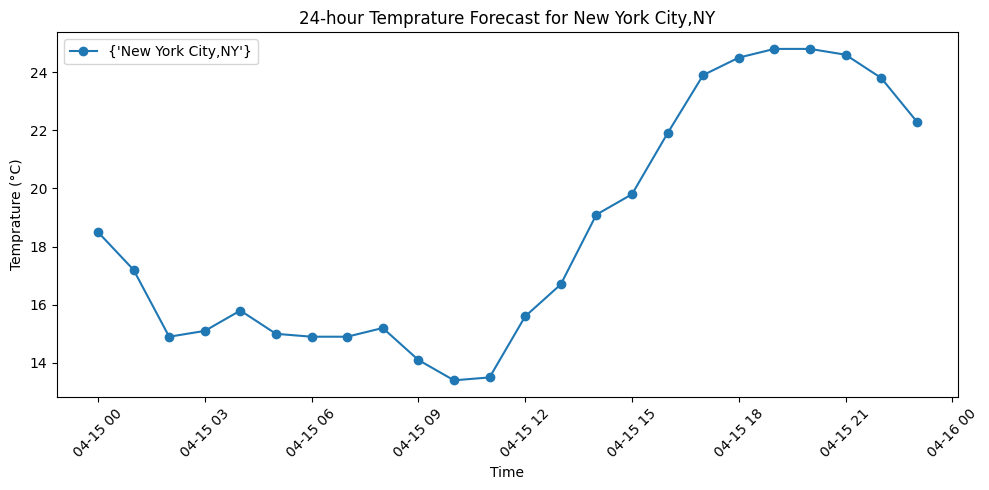

Fetching data for Los Angeles,CA...
Data fetched for Los Angeles,CA in 0.6817 seconds.
Analyzing and visualizing weather forecast for Los Angeles,CA...


,time,temperature
0,"[2024-04-15T00:00, 2024-04-15T01:00, 2024-04-1...","[12.8, 13.3, 12.6, 11.4, 10.7, 10.1, 9.8, 9.3,..."


{'latitude': 34.060257, 'longitude': -118.234344, 'generationtime_ms': 0.03802776336669922, 'utc_offset_seconds': 0, 'timezone': 'GMT', 'timezone_abbreviation': 'GMT', 'elevation': 91.0, 'hourly_units': {'time': 'iso8601', 'temperature': '°C'}, 'hourly': {'time': ['2024-04-15T00:00', '2024-04-15T01:00', '2024-04-15T02:00', '2024-04-15T03:00', '2024-04-15T04:00', '2024-04-15T05:00', '2024-04-15T06:00', '2024-04-15T07:00', '2024-04-15T08:00', '2024-04-15T09:00', '2024-04-15T10:00', '2024-04-15T11:00', '2024-04-15T12:00', '2024-04-15T13:00', '2024-04-15T14:00', '2024-04-15T15:00', '2024-04-15T16:00', '2024-04-15T17:00', '2024-04-15T18:00', '2024-04-15T19:00', '2024-04-15T20:00', '2024-04-15T21:00', '2024-04-15T22:00', '2024-04-15T23:00', '2024-04-16T00:00', '2024-04-16T01:00', '2024-04-16T02:00', '2024-04-16T03:00', '2024-04-16T04:00', '2024-04-16T05:00', '2024-04-16T06:00', '2024-04-16T07:00', '2024-04-16T08:00', '2024-04-16T09:00', '2024-04-16T10:00', '2024-04-16T11:00', '2024-04-16T12:

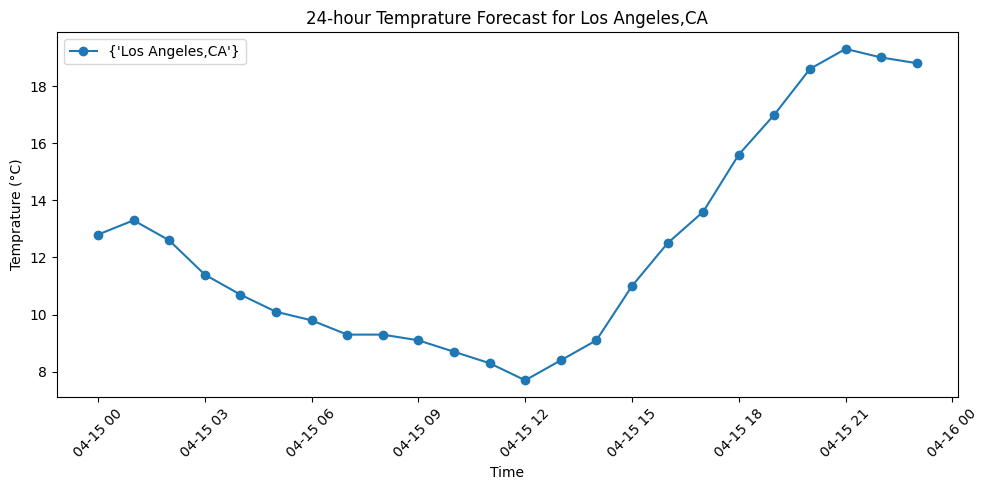

Total execution time: 3.5265 seconds.


In [ ]:
 #This main method gets the location of where we want to analyze, gathers the weather forecast then analyzes and visualizes it


def main(): # Defines the main method
  locations = { # Creates a dictionary containg the locations of the weather we want to see
      "New York City,NY":{"Latitude": 40.7128, "Longitude":-74.0060},

      "Los Angeles,CA": {"Latitude": 34.0522, "Longitude":-118.2437}
      }

  for city, coords in locations.items():
        print(f"Fetching data for {city}...")

        start_time = timeit.default_timer()  # Start timing
        forecast_data = fetch_weather_forecast(coords['Latitude'], coords['Longitude'])
        elapsed = timeit.default_timer() - start_time  # End timing
        print(f"Data fetched for {city} in {elapsed:.4f} seconds.")

        print(f"Analyzing and visualizing weather forecast for {city}...")
        # analyze_and_visualize_forecast(forecast_data, city)

        if forecast_data:
            df = convert_to_dataframe(forecast_data)
            if df is not None:
                print(f"Analyzing and visualizing weather forecast for {city}...")
                analyze_and_visualize_forecast(forecast_data, city)
                #compute_average_weather_metrics(df)
            else:
                print(f"Failed to convert forecast data into DataFrame for {city}")
        else:
            print(f"Failed to fetch data for {city}")

if __name__ =="__main__":
  start_time = timeit.default_timer() # Measures the start time of the main method
  main() # calls the main method to excute the program
  elasped = timeit.default_timer() - start_time # Measures the total ecxution time of the main method
  print(f"Total execution time: {elasped:.4f} seconds.") # Prints the total time taken to excute the main method

